In [ ]:
import torch
%matplotlib inline
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y.reshape(-1, 1)

## Convert to pytorch sensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train, X_val, y_train, y_val = train_test_split(
    X_tensor, y_tensor, test_size = 0.2, random_state = 23)


In [ ]:
## Neural network
model = nn.Sequential(
    nn.Linear(30,64), ## 30 input features, 64 neurons
    nn.ReLU(),
    nn.Linear(64,32), ## 64 inputs, 32 neurons
    nn.ReLU(),
    nn.Linear(32,16), ## 32 inputs, 16 neurons
    nn.ReLU(),
    nn.Linear(16,1) ## 16 inputs, 1 neuron
)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 200
train_losses = []
val_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, y_train)
    train_loss.backward()
    optimizer.step()

    ## Validation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d} | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f}")
print(f"Epoch {num_epochs} (Final) | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

training_time = time.time() - start_time

y_val_true = y_val.detach().numpy()
y_val_pred = y_val_pred.detach().numpy()

print("\n Final Results")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")


Epoch   0 | Train Loss: 0.6714 | Val Loss: 0.6610
Epoch  20 | Train Loss: 0.5498 | Val Loss: 0.5322
Epoch  40 | Train Loss: 0.3095 | Val Loss: 0.2829
Epoch  60 | Train Loss: 0.1176 | Val Loss: 0.0907
Epoch  80 | Train Loss: 0.0714 | Val Loss: 0.0586
Epoch 100 | Train Loss: 0.0540 | Val Loss: 0.0558
Epoch 120 | Train Loss: 0.0428 | Val Loss: 0.0568
Epoch 140 | Train Loss: 0.0341 | Val Loss: 0.0579
Epoch 160 | Train Loss: 0.0270 | Val Loss: 0.0598
Epoch 180 | Train Loss: 0.0212 | Val Loss: 0.0617
Epoch 200 (Final) | Train Loss: 0.0168 | Val Loss: 0.0634

 Final Results
Training Time: 0.81 seconds
Final Training Loss: 0.0168
Final Validation Loss: 0.0634


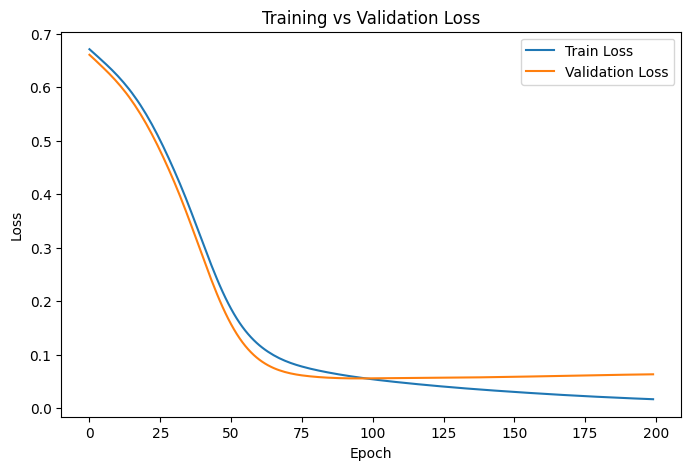

In [ ]:
## Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [ ]:
## Classification metrics
model.eval()
with torch.no_grad():
    y_val_logits = model(X_val)
    y_val_prob = torch.sigmoid(y_val_logits) > 0.5
    y_val_pred = (y_val_prob >= 0.5).int()

y_true = y_val.numpy()
y_pred = y_val_pred.numpy()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

Accuracy:  0.9825
Precision: 0.9867
Recall:    0.9867
F1 Score:  0.9867
Training Time: 0.81 seconds


In [ ]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='rbf')
svm.fit(X_scaled, y)
svm_pred = svm.predict(X_scaled)
print("\nSVM (RBF):")
print("Accuracy:", accuracy_score(y, svm_pred))
print("Precision:", precision_score(y, svm_pred))
print("Recall:", recall_score(y, svm_pred))
print("F1:", f1_score(y, svm_pred))


SVM (RBF):
Accuracy: 0.9876977152899824
Precision: 0.9807692307692307
Recall: 1.0
F1: 0.9902912621359223
